In [11]:

# Multiple Linear Regression 

## Objectives

# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, test it and use the model

#In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. 

#An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 


In [3]:
#Importing Needed packages 
%pip install scikit-learn
%pip install matplotlib
%pip install pandas 
%pip install numpy 
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<ipython-input-4-3d104a232ce4>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
#Download data as .csv and read in the dataframe 

df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
###Understanding the data:

### `FuelConsumption.csv`:
#We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [12]:
#Let's select some features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


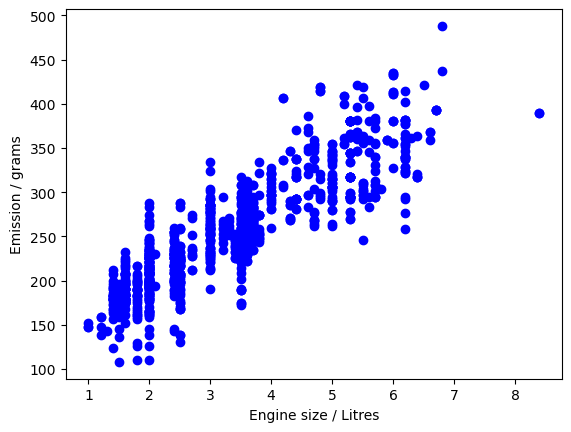

In [22]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size / Litres")
plt.ylabel("Emission / grams")
plt.show()

In [ ]:
#### Creating train and test dataset
#Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
#This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

#We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

#Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

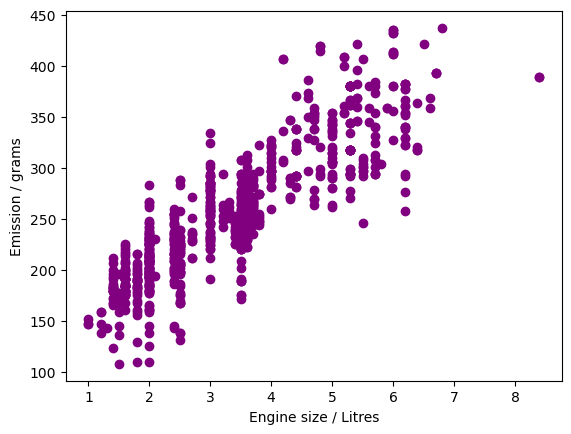

In [27]:
#### Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size / Litres")
plt.ylabel("Emission / grams")
plt.show()

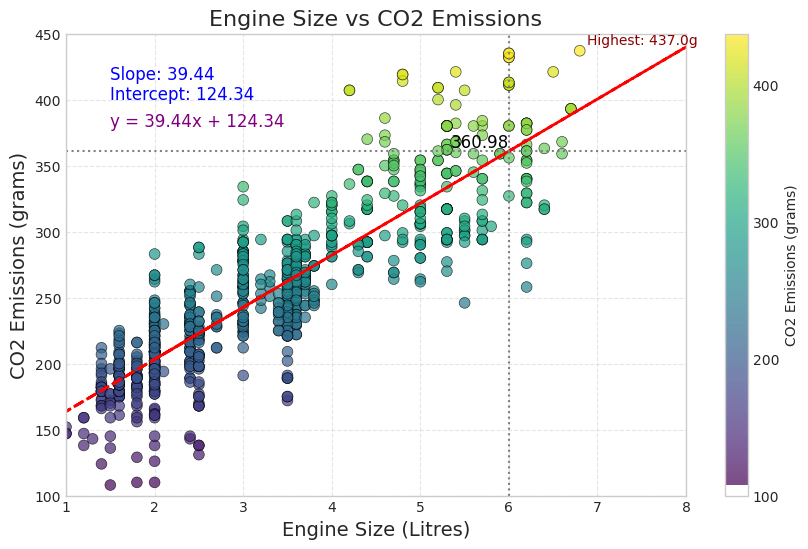

In [32]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Scatter plot with color map
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c=train.CO2EMISSIONS, cmap='viridis', s=60, alpha=0.7, edgecolor='k', linewidth=0.5)
color_bar = plt.colorbar(label="CO2 Emissions (grams)")
color_bar.set_ticks([100, 200, 300, 400])

# Add trend line
m, b = np.polyfit(train.ENGINESIZE, train.CO2EMISSIONS, 1)
plt.plot(train.ENGINESIZE, m * train.ENGINESIZE + b, color='red', linestyle='--', linewidth=2)

# Display the coefficient and intercept on the plot
plt.text(1.5, 400, f"Slope: {m:.2f}\nIntercept: {b:.2f}", fontsize=12, color="blue")

# Add the line equation just below the blue text
plt.text(1.5, 380, f"y = {m:.2f}x + {b:.2f}", fontsize=12, color="purple")

# Add a vertical dotted line at x = 6
plt.axvline(x=6, color='gray', linestyle=':', linewidth=1.5)

# Calculate y-value at x = 6 using the line equation
y_at_x6 = m * 6 + b

# Add a horizontal dotted line at the y-value for x = 6
plt.axhline(y=y_at_x6, color='gray', linestyle=':', linewidth=1.5)

# Display the y-value at the intercept point in black
plt.text(6, y_at_x6, f"{y_at_x6:.2f}", fontsize=12, color="black", verticalalignment='bottom', horizontalalignment='right')

# Axis labels, title, and limits
plt.title("Engine Size vs CO2 Emissions", fontsize=16)
plt.xlabel("Engine Size (Litres)", fontsize=14)
plt.ylabel("CO2 Emissions (grams)", fontsize=14)
plt.xlim(1, 8)
plt.ylim(100, 450)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate highest CO2 emission point
max_emission = train[train.CO2EMISSIONS == train.CO2EMISSIONS.max()]
for i, row in max_emission.iterrows():
    plt.annotate(f"Highest: {row.CO2EMISSIONS}g", (row.ENGINESIZE, row.CO2EMISSIONS), 
                 xytext=(5, 5), textcoords="offset points", fontsize=10, color="darkred")

plt.show()


In [33]:
##Multiple Regression Model 

#In reality, there are multiple variables that impact the co2emission. 

#When more than one independent variable is present, the process is called multiple linear regression. 

#An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 

#The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [49]:
# Training with three features
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x_train, y_train)

# Obtain the coefficients of the fitted line:
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.05285151  8.19449426  9.72360424]]


In [50]:
#As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 

#Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. 

#Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
#OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

#OLS can find the best parameters using of the following methods:
#* Solving the model parameters analytically using closed-form equations.
#* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.).

# Interpretation of results of the Model with Three Features:

#Features: ENGINESIZE, CYLINDERS, and FUELCONSUMPTION_COMB.
#Coefficients: [10.05, 8.19, 9.72]. Each coefficient represents the effect of the corresponding feature on CO2 emissions. For example, increasing engine size by one unit increases CO2 emissions by approximately 10.05 units, holding other factors constant.


In [51]:
# Prediction with three features
x_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Mean Squared Error (MSE): 558.82
Variance score: 0.85


In [ ]:
#Mean Squared Error (MSE): 558.82. This measures the average squared difference between predicted and actual CO2 emissions values.
#Variance Score (R²): 0.85, meaning the model explains 85% of the variance in CO2 emissions.

In [46]:
#__Explained variance regression score:__  
#Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

#$\texttt{explainedVariance}(y, \hat{y}) = 1 - Var\{ y - yhat}\{Var{y} 
#The best possible score is 1.0, the lower values are worse.


In [54]:
# Now I'll use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. 

#Does it result in better accuracy?

In [55]:
# Training with four features
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x_train, y_train)
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.11736918  7.76531014  6.50292136  2.83305483]]


In [56]:
# Prediction with four features
x_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Mean Squared Error (MSE): 561.95
Variance score: 0.85


In [57]:
##Analysis and Discussion of results:

# When using FUELCONSUMPTION_COMB alongside other features (ENGINESIZE, CYLINDERS), the Mean Squared Error (MSE) was around 570.12 with a Variance score (R²) of 0.88.

#When using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB, alongside the same additional features (ENGINESIZE, CYLINDERS), the Residual Sum of Squares (which is equivalent to MSE) was 569.48 with an R² score still around 0.88.

##Interpretation:
#The MSE difference between the two approaches is minimal (570.12 vs. 569.48), suggesting that using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY does not significantly improve the model's accuracy over using FUELCONSUMPTION_COMB.
#The R² score remains the same at 0.88, which means the model’s explanatory power did not improve when switching to FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY.

##Conclusion
#Using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB does not result in a meaningful improvement in accuracy in this case. It might be sufficient to continue using FUELCONSUMPTION_COMB for simplicity unless there are other reasons to include the separate city and highway consumption values.

#Interpretation:

#Comparison: The MSE difference between the two models is minimal (558.82 vs. 561.95), and both models have the same R² score of 0.85.
#Conclusion: Adding FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY does not significantly improve the model over using FUELCONSUMPTION_COMB alone, making it a more efficient choice for similar accuracy

In [58]:
## Understanding Mean Squared Error (MSE) and R-squared (R²)

#The **Mean Squared Error (MSE)** and **R-squared (R²)** are two commonly used metrics for evaluating the performance of a regression model. Here’s what each of them tells us:

### 1. Mean Squared Error (MSE)
#MSE is the average of the squared differences between the predicted values (\(\hat{y}\)) and the actual values (\(y\)). Mathematically, it is defined as:

#**Interpretation**: MSE indicates the **average squared error** the model makes on the test set.
  # A **lower MSE** means the predictions are closer to the actual values, indicating a better fit.
  # A **higher MSE** suggests the model's predictions are further from the actual values, meaning the model may not be capturing the underlying trend well.

# **Units**: MSE has the same units as the target variable squared, so it can be difficult to interpret in practical terms. However, it’s useful for comparing models or parameter choices where the unit isn’t as important.

### 2. R-squared (R²)
# **Definition**: R-squared, also known as the **coefficient of determination**, is the proportion of the variance in the dependent variable that is predictable from the independent variables. It is defined as:

#**Interpretation**: R² provides an indication of the **goodness of fit** of the model:
  # R² = 1: Perfect fit. The model explains 100% of the variance in the target variable.
  # R² = 0: The model does not explain any of the variance in the target variable (equivalent to using the mean of \(y\) as the prediction).
  # R² < 0: The model performs worse than a horizontal line representing the mean of \(y\), meaning it’s not capturing the trend in the data at all.

  #R² values closer to 1 indicate a better fit, as the model explains a greater proportion of the variance.

### Difference in MSE and R² Across Models
#When you compare two models:
# **Lower MSE** and **higher R²** generally indicate a better model fit. 
# However, it’s important to note that MSE and R² alone do not tell the full story. For example:
  # **Overfitting**: A model with very low MSE and high R² on the training set may overfit, performing poorly on unseen data.
  # **Model Complexity**: Adding more features or using more complex models can artificially improve R² and reduce MSE on the training data, even if they don’t generalize well.

#In practice, **comparing MSE and R² on a test set** or with cross-validation gives a better indication of how well your model generalizes. 

### Summary
# **MSE** measures the average error size, where lower values indicate closer predictions.
# **R²** measures the proportion of variance explained, where higher values indicate better fit.
# Differences in MSE and R² across models can indicate which model fits the data better but must be interpreted carefully to avoid issues like overfitting.


<class 'SyntaxError'>: invalid character '²' (U+00B2) (<ipython-input-58-096eba9ad3e8>, line 3)